In [5]:
import os
import re
import cv2
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
sns.set_style("whitegrid")
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')
import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.model_selection import train_test_split

In [ ]:
!wget --header="Host: openi.nlm.nih.gov" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://openi.nlm.nih.gov/faq" --header="Cookie: ncbi_sid=8A1BC6C8FFB50A11_1682SID; pmc.article.report=; _ga=GA1.2.1024901484.1610305706; lbnodeid=909381250.47873.0000; _ga=GA1.4.1024901484.1610305706; JSESSIONID=BD77221C4057639243BF80CB72FE15EA; _gid=GA1.2.1261986835.1621316665; _gid=GA1.4.1261986835.1621316665; _gat=1; _gat_nlmtracker=1; _gat_UA-137948717-1=1" --header="Connection: keep-alive" "https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz" -c -O 'NLMCXR_png.tgz'

--2024-12-16 05:03:16--  https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.65.157, 2607:f220:41e:7065::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.65.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1360814128 (1.3G) [application/x-gzip]
Saving to: ‘NLMCXR_png.tgz’

NLMCXR_png.tgz      100%[===================>]   1.27G  2.79MB/s    in 7m 49s  

2024-12-16 05:11:06 (2.77 MB/s) - ‘NLMCXR_png.tgz’ saved [1360814128/1360814128]



In [ ]:
!wget --header="Host: openi.nlm.nih.gov" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://openi.nlm.nih.gov/faq" --header="Cookie: ncbi_sid=8A1BC6C8FFB50A11_1682SID; pmc.article.report=; _ga=GA1.2.1024901484.1610305706; lbnodeid=909381250.47873.0000; _ga=GA1.4.1024901484.1610305706; JSESSIONID=DC2AA13E34F6151F2CE3A739C64DD9DA; _gid=GA1.2.819975763.1621166700; _gid=GA1.4.819975763.1621166700; _gat=1; _gat_nlmtracker=1; _gat_UA-137948717-1=1" --header="Connection: keep-alive" "https://openi.nlm.nih.gov/imgs/collections/NLMCXR_reports.tgz" -c -O 'NLMCXR_reports.tgz'

--2024-12-16 05:11:09--  https://openi.nlm.nih.gov/imgs/collections/NLMCXR_reports.tgz
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.65.157, 2607:f220:41e:7065::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.65.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112632 (1.1M) [application/x-gzip]
Saving to: ‘NLMCXR_reports.tgz’

NLMCXR_reports.tgz  100%[===================>]   1.06M  2.33MB/s    in 0.5s    

2024-12-16 05:11:10 (2.33 MB/s) - ‘NLMCXR_reports.tgz’ saved [1112632/1112632]



## Unzip the files

In [ ]:
cwd = os.getcwd()

In [ ]:
import tarfile
images = tarfile.open('NLMCXR_png.tgz')
images.extractall(cwd+'/images/')

In [ ]:
xml = tarfile.open('NLMCXR_reports.tgz')
xml.extractall(cwd+'/reports/')

### Displaying the random images

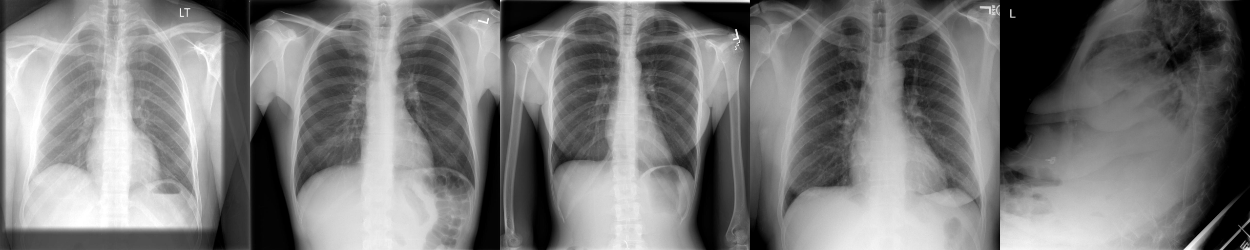

In [ ]:
#print 5 sample images
img_lst=[]
for i in range(0,5):
  k = np.random.choice(range(len(os.listdir('/content/images'))))
  image_file = os.listdir('/content/images')[k]
  #getting an image file
  img = cv2.imread(os.path.join('/content/images',image_file))
  img = cv2.resize(img, (250, 250))
  img_lst.append(img)
img_lst = np.hstack(img_lst)
cv2_imshow(img_lst)

In [ ]:
with open("/content/reports/ecgen-radiology/1.xml", 'r') as f:
    print(f.read())

<?xml version="1.0" encoding="utf-8"?>
<eCitation>
   <meta type="rr"/>
   <uId id="CXR1"/>
   <pmcId id="1"/>
   <docSource>CXR</docSource>
   <IUXRId id="1"/>
   <licenseType>open-access</licenseType>
   <licenseURL>http://creativecommons.org/licenses/by-nc-nd/4.0/</licenseURL>
   <ccLicense>byncnd</ccLicense>
   <articleURL/>
   <articleDate>2013-08-01</articleDate>
   <articleType>XR</articleType>
   <publisher>Indiana University</publisher>
   <title>Indiana University Chest X-ray Collection</title>
   <note>The data are drawn from multiple hospital systems.</note>
   <specialty>pulmonary diseases</specialty>
   <subset>CXR</subset>
   <MedlineCitation Owner="Indiana University" Status="supplied by publisher">
   
      <Article PubModel="Electronic">
      
         <Journal>
         
            <JournalIssue>
            
               <PubDate>
               
                  <Year>2013</Year>
               
                  <Month>08</Month>
               
            

In [ ]:
print('Total Images in data : ', len(os.listdir('/content/images')))
print('Total Reports in data : ', len(os.listdir('/content/reports/ecgen-radiology')))

Total Images in data :  7471
Total Reports in data :  3955


In [ ]:
#list of count of images
img_count = []
for file in os.listdir('/content/reports/ecgen-radiology'):
  xml_file = os.path.join('/content/reports/ecgen-radiology',file)
  #reading the xml data
  with open(xml_file, 'r') as f:
    data = f.read()
  #getting all the image names
  regex = r"parentImage id.*"
  k  = re.findall(regex,data)
  temp = len(k)
  img_count.append(temp)

print("The max number of images associated with a report:",np.array(img_count).max())
print("The min number of images associated with a report:",np.array(img_count).min())

The max number of images associated with a report: 5
The min number of images associated with a report: 0


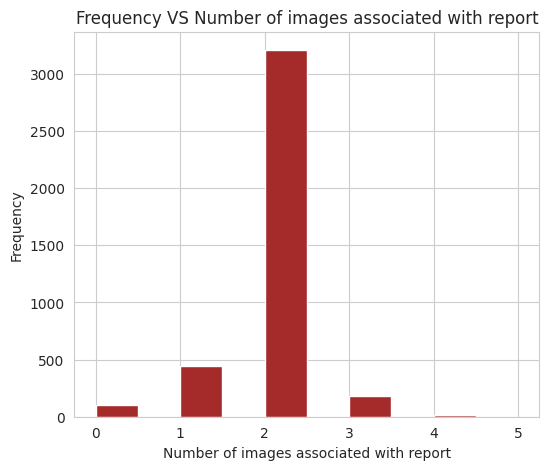

In [ ]:
plt.figure(figsize = (6,5))
ax = pd.Series(img_count).plot(kind='hist',color='brown')
ax.set_xlabel('Number of images associated with report')
ax.set_title("Frequency VS Number of images associated with report")
plt.show()

In [ ]:
print("Images per patient :\n")
print(pd.Series(img_count).value_counts())

Images per patient :

2    3208
1     446
3     181
0     104
4      15
5       1
Name: count, dtype: int64


In [ ]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
from tqdm import tqdm

columns = ["image_name", "image_caption", "comparison", "indication", "findings", "impression"]
dataframe = pd.DataFrame(columns=columns)

for file in tqdm(os.listdir('/content/reports/ecgen-radiology/')):
    # Find files with .xml extension only
    if file.endswith(".xml"):
        # Parse the XML file
        tree = ET.parse('/content/reports/ecgen-radiology/' + file)

        findings = tree.find(".//AbstractText[@Label='FINDINGS']").text
        indication = tree.find(".//AbstractText[@Label='INDICATION']").text
        comparision = tree.find(".//AbstractText[@Label='COMPARISON']").text
        impression = tree.find(".//AbstractText[@Label='IMPRESSION']").text

        caption = set()
        name_img = set()
        # Find images in each parentImage tag
        for iterator in tree.findall("parentImage"):
            img = iterator.attrib['id'] + ".png"
            name_img.add(img)
            # Add the corresponding report for each image
            caption.add('' if iterator.find('caption').text is None else iterator.find('caption').text)

        # Create a DataFrame row
        new_row = pd.DataFrame([{
            "image_name": ','.join(name_img),
            "image_caption": ','.join(caption),
            "comparison": comparision,
            "indication": indication,
            "findings": findings,
            "impression": impression
        }])

        # Concatenate the new row to the DataFrame
        dataframe = pd.concat([dataframe, new_row], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/reports/ecgen-radiology/'

In [ ]:
dataframe.head()

image_name  \
0  CXR1104_IM-0071-4001.png,CXR1104_IM-0071-3001....   
1  CXR2244_IM-0841-2002.png,CXR2244_IM-0841-3003.png   
2  CXR2026_IM-0671-2001.png,CXR2026_IM-0671-1001.png   
3  CXR1404_IM-0258-2001.png,CXR1404_IM-0258-1001.png   
4  CXR1177_IM-0120-3001.png,CXR1177_IM-0120-1001.png   

                         image_caption       comparison  \
0  Chest, 2 views, frontal and lateral             None   
1            Xray Chest PA and Lateral             None   
2            Xray Chest PA and Lateral  None available.   
3  CHEST PA and Lateral on XXXX, XXXX              XXXX   
4                       Chest 2 views             XXXX.   

                                          indication  \
0                    Tachycardia, diabetes, hypoxia.   
1  ,V72.82,305.1 preop chest x-XXXX GYN surgery. ...   
2  The patient is a XXXX-year-old XXXX with back ...   
3  XXXX year old with chest pain, shortness of br...   
4                                XXXX onset of XXXX.   

                                            findings  \
0                                               None   
1                                               None   
2  The trachea is midline. Cardiomediastinal silh...   
3  No focal lung consolidation. Heart size and pu...   
4  Normal heart. Clear lungs. Trachea midline. Sc...   

                                          impression  
0  The cardiac contours are normal. Prominent hil...  
1  No comparison chest x-XXXX. Well-expanded and ...  
2          No acute cardiopulmonary abnormalities. .  
3  1. No acute findings. 2. Stable midthoracic ve...  
4              No acute cardiopulmonary abnormality.

In [ ]:
# Shape of the DataFrame
print('Shape of the Dataframe : ', dataframe.shape)

Shape of the Dataframe :  (3955, 6)


### Preprocessing

In [ ]:
# function for obtaining the different information part of the xml report file and preprocessing them and also adding the concernced image and report information to the dataframe
def decontracted(phrase): #https://stackoverflow.com/a/47091490
  """
  performs text decontraction of words like won't to will not
  """
  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [ ]:
def preprocess_text(data): #https://regex101.com/
  """
  extracts the information data from the xml file and does text preprocessing on them
  here info can be 1 value in this list ["COMPARISON","INDICATION","FINDINGS","IMPRESSION"]
  """
  preprocessed = []

  for sentence in tqdm(data.values):

    sentence = BeautifulSoup(sentence, 'lxml').get_text()

    regex = r"\d."
    sentence = re.sub(regex,"",sentence) #removing all values like "1." and "2." etc

    regex = r"X+"
    sentence = re.sub(regex,"",sentence) #removing words like XXXX

    regex = r"[^.a-zA-Z]"
    sentence = re.sub(regex," ",sentence) #removing all special characters except for full stop

    regex = r"http\S+"
    sentence = re.sub(regex,"", sentence)
    sentence = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?$%^&*'/+_]+", "", sentence)
    sentence = re.sub('&', 'and',sentence)
    sentence = re.sub('@', 'at',sentence)
    sentence = re.sub('0', 'zero',sentence)
    sentence = re.sub('1', 'one',sentence)
    sentence = re.sub('2', 'two',sentence)
    sentence = re.sub('3', 'three',sentence)
    sentence = re.sub('4', 'four',sentence)
    sentence = re.sub('5', 'five',sentence)
    sentence = re.sub('6', 'six',sentence)
    sentence = re.sub('7', 'seven',sentence)
    sentence = re.sub('8', 'eight',sentence)
    sentence = re.sub('9', 'nine',sentence)
    sentence = re.sub('year old', "", sentence)#Occur multiple times in Indication feature but not necessary
    sentence = re.sub('yearold', "", sentence)
    sentence = decontracted(sentence) #perform decontraction
    sentence = sentence.strip().lower() #strips the begining and end of the string of spaces and converts all into lowercase
    sentence = " ".join(sentence.split()) #removes unwanted spaces
    if sentence=="": #if the resulting sentence is an empty string return null value
      sentence = np.nan
    preprocessed.append(sentence)
  return preprocessed

In [ ]:
#Check for Null values in Text columns
NaN = dataframe.isnull().sum()
print("Total Nan Values in caption columns -",NaN[1])
print("Total Nan Values in comparison columns -",NaN[2])
print("Total Nan Values in Indication columns -",NaN[3])
print("Total Nan Values in findings columns   -",NaN[4])
print("Total Nan Values in Impression columns -",NaN[5])

Total Nan Values in caption columns - 0
Total Nan Values in comparison columns - 0
Total Nan Values in Indication columns - 0
Total Nan Values in findings columns   - 0
Total Nan Values in Impression columns - 0


In [ ]:
#Replacing the nan values
dataframe['image_caption'] = dataframe['image_caption'].fillna('Unknown')
dataframe['comparison'] = dataframe['comparison'].fillna('No Comparison')
dataframe['indication'] = dataframe['indication'].fillna('No Indication')
dataframe['findings'] = dataframe['findings'].fillna('No Findings')
dataframe['impression'] = dataframe['impression'].fillna('No Impression')

In [ ]:
#Check for Null values in Text columns
NaN = dataframe.isnull().sum()
print("Total Nan Values in caption columns -",NaN[1])
print("Total Nan Values in comparison columns -",NaN[2])
print("Total Nan Values in Indication columns -",NaN[3])
print("Total Nan Values in findings columns   -",NaN[4])
print("Total Nan Values in Impression columns -",NaN[5])

Total Nan Values in caption columns - 0
Total Nan Values in comparison columns - 0
Total Nan Values in Indication columns - 0
Total Nan Values in findings columns   - 0
Total Nan Values in Impression columns - 0


In [ ]:
#Preprocessing of text features
dataframe['image_caption'] = preprocess_text(dataframe['image_caption'])
dataframe['comparison'] = preprocess_text(dataframe['comparison'])
dataframe['indication'] = preprocess_text(dataframe['indication'])
dataframe['findings'] = preprocess_text(dataframe['findings'])
dataframe['impression'] = preprocess_text(dataframe['impression'])

100%|██████████| 3955/3955 [00:00<00:00, 4059.38it/s]


In [ ]:
dataframe.head()

image_name  \
0  CXR1104_IM-0071-4001.png,CXR1104_IM-0071-3001....   
1  CXR2244_IM-0841-2002.png,CXR2244_IM-0841-3003.png   
2  CXR2026_IM-0671-2001.png,CXR2026_IM-0671-1001.png   
3  CXR1404_IM-0258-2001.png,CXR1404_IM-0258-1001.png   
4  CXR1177_IM-0120-3001.png,CXR1177_IM-0120-1001.png   

                     image_caption      comparison  \
0  chest views frontal and lateral            none   
1         ray chest pa and lateral   no comparison   
2         ray chest pa and lateral  none available   
3          chest pa and lateral on             NaN   
4                      chest views             NaN   

                                         indication  \
0                      tachycardia diabetes hypoxia   
1                       v preop chest x gyn surgery   
2                   the patient is a with back pain   
3  with chest pain shortness of breath hypertension   
4                                          onset of   

                                            findings  \
0                                        no findings   
1                                        no findings   
2  the trachea is midline cardiomediastinal silho...   
3  no focal lung consolidation heart size and pul...   
4  normal heart clear lungs trachea midline scoli...   

                                          impression  
0  the cardiac contours are normal prominent hila...  
1  no comparison chest x well expanded and clear ...  
2             no acute cardiopulmonary abnormalities  
3  no acute findings stable midthoracic vertebral...  
4               no acute cardiopulmonary abnormality

In [ ]:
dataframe.replace("", float("NaN"), inplace=True)

In [ ]:
#percentage missing values
print(dataframe.isnull().sum()*100/dataframe.shape[0] )

image_name       2.629583
image_caption    0.000000
comparison       0.000000
indication       0.000000
findings         0.000000
impression       0.000000
dtype: float64


In [ ]:
dataframe.dropna(subset = ["image_name"], inplace=True)
dataframe.shape

(3851, 6)

In [ ]:
dataframe.head()

image_name  \
0  CXR1104_IM-0071-4001.png,CXR1104_IM-0071-3001....   
1  CXR2244_IM-0841-2002.png,CXR2244_IM-0841-3003.png   
2  CXR2026_IM-0671-2001.png,CXR2026_IM-0671-1001.png   
3  CXR1404_IM-0258-2001.png,CXR1404_IM-0258-1001.png   
4  CXR1177_IM-0120-3001.png,CXR1177_IM-0120-1001.png   

                     image_caption      comparison  \
0  chest views frontal and lateral            none   
1         ray chest pa and lateral   no comparison   
2         ray chest pa and lateral  none available   
3          chest pa and lateral on   no comparison   
4                      chest views   no comparison   

                                         indication  \
0                      tachycardia diabetes hypoxia   
1                       v preop chest x gyn surgery   
2                   the patient is a with back pain   
3  with chest pain shortness of breath hypertension   
4                                          onset of   

                                            findings  \
0                                        no findings   
1                                        no findings   
2  the trachea is midline cardiomediastinal silho...   
3  no focal lung consolidation heart size and pul...   
4  normal heart clear lungs trachea midline scoli...   

                                          impression  
0  the cardiac contours are normal prominent hila...  
1  no comparison chest x well expanded and clear ...  
2             no acute cardiopulmonary abnormalities  
3  no acute findings stable midthoracic vertebral...  
4               no acute cardiopulmonary abnormality

In [ ]:
dataframe['image_count'] = dataframe['image_name'].astype(str).str.split(',').apply(len)

In [ ]:
#Adding word count feature for indication, findings and impression
dataframe['indication_count'] = dataframe['indication'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
dataframe['findings_count'] = dataframe['findings'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
dataframe['impression_count'] = dataframe['impression'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
dataframe.head()

image_name  \
0  CXR1104_IM-0071-4001.png,CXR1104_IM-0071-3001....   
1  CXR2244_IM-0841-2002.png,CXR2244_IM-0841-3003.png   
2  CXR2026_IM-0671-2001.png,CXR2026_IM-0671-1001.png   
3  CXR1404_IM-0258-2001.png,CXR1404_IM-0258-1001.png   
4  CXR1177_IM-0120-3001.png,CXR1177_IM-0120-1001.png   

                     image_caption      comparison  \
0  chest views frontal and lateral            none   
1         ray chest pa and lateral   no comparison   
2         ray chest pa and lateral  none available   
3          chest pa and lateral on   no comparison   
4                      chest views   no comparison   

                                         indication  \
0                      tachycardia diabetes hypoxia   
1                       v preop chest x gyn surgery   
2                   the patient is a with back pain   
3  with chest pain shortness of breath hypertension   
4                                          onset of   

                                            findings  \
0                                        no findings   
1                                        no findings   
2  the trachea is midline cardiomediastinal silho...   
3  no focal lung consolidation heart size and pul...   
4  normal heart clear lungs trachea midline scoli...   

                                          impression  image_count  \
0  the cardiac contours are normal prominent hila...            3   
1  no comparison chest x well expanded and clear ...            2   
2             no acute cardiopulmonary abnormalities            2   
3  no acute findings stable midthoracic vertebral...            2   
4               no acute cardiopulmonary abnormality            2   

   indication_count  findings_count  impression_count  
0                 3               2                14  
1                 6               2                19  
2                 7              32                 4  
3                 7              32                 8  
4                 2              16                 4

### Exploring the image features

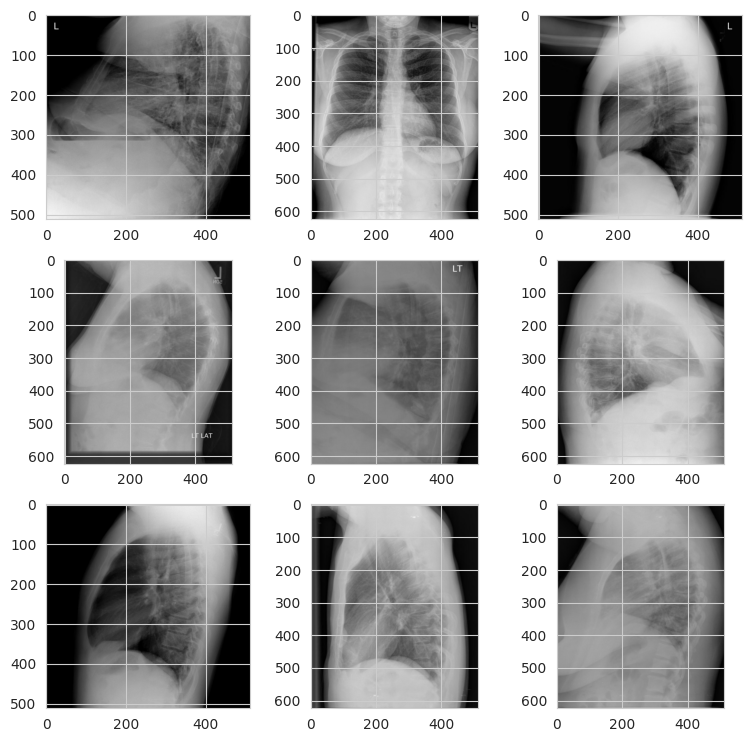

In [ ]:
#Displaying sample 9 patient X-Ray
fig, axs = plt.subplots(3, 3, figsize = (9,9))
ax = axs.flatten()
for df, figure in zip(dataframe[0:10].itertuples(), ax):
    image=mpimg.imread("/content/images/"+df.image_name.split(',')[0])
    figure.imshow(image)
plt.show()

In [ ]:
def show_image_captions(df,sample):
    '''This function prints the sample images and its other text features.
       Parameters :
       - df: dataframe
       - sample: Number of datapoints'''

    sampled_row = df.sample(sample)

    for count, row in sampled_row.iterrows():
        print("Caption :",row['image_caption'])
        imgs = row["image_name"].split(',')
        fig, axs = plt.subplots(1, len(imgs), figsize = (10,10))
        iterator = 0

        for img, figure in zip(imgs, axs.flat):
            image= mpimg.imread("/content/images/"+img)
            imgplot = axs[iterator].imshow(image)
            iterator +=1

        plt.show()
        print("\nComparision :",row.get('comparision'))
        print("\nIndication :",row.get('indication'))
        print("\nFindings :",row.get('findings'))
        print("\nImpression :",row.get('impression'))
        print("="*100,'\n')

Caption : pa and lateral of the chest


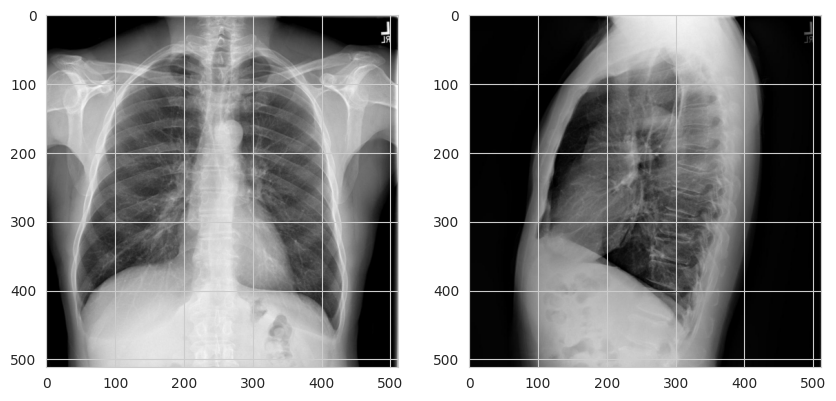


Comparision : None

Indication : bone marrow transplant workup

Findings : there is no focal consolidation there is no pneumothorax or large pleural effusion the cardiomediastinal contours are grossly unremarkable the heart size is within normal limits there are mild thoracic spine degenerative changes

Impression : no acute cardiopulmonary findings

Caption : pa and lateral chest x dated at am


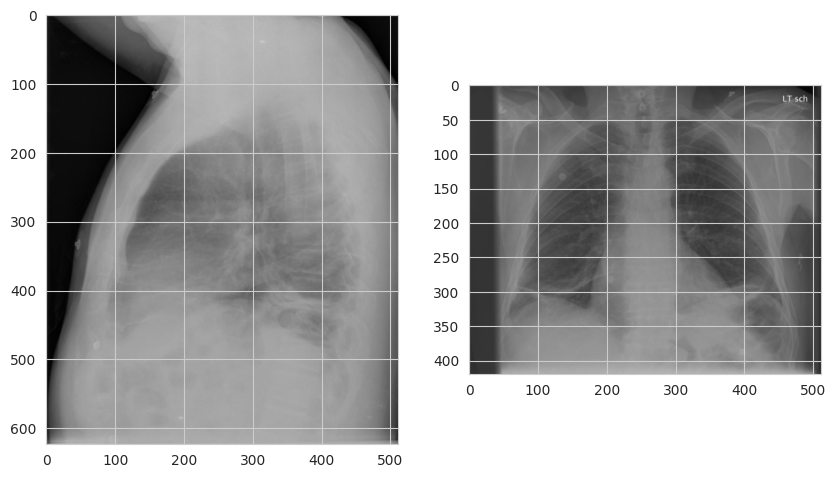


Comparision : None

Indication : with recent myocardial infarction increasing oxygen requirements

Findings : cardiomediastinal silhouette is stable and within normal limits there is improved lung volumes bilaterally with persistent bibasilar atelectatic opacities without focal consolidation pneumothorax or effusion no acute bony abnormality identified

Impression : improving lung volumes with bibasilar atelectasis



In [ ]:
#showing sample 2 datapoints
show_image_captions(dataframe, 2)

### Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe.to_csv("data.csv", index=False)
dataframe = pd.read_csv('/content/data.csv')

In [ ]:
dataframe.to_csv('/content/drive/MyDrive/Major_Project/Data/cleaned_dataframe.csv', index=False)

In [6]:
dataframe = pd.read_csv("/content/drive/MyDrive/Major_Project/Data/cleaned_dataframe.csv")

### Exploring the text features

In [7]:
k = dataframe.loc[(dataframe.comparison == 'none') | (dataframe.comparison == 'no comparison')]
print("Number of rows with no informnation in comparision label:",k.shape[0])

Number of rows with no informnation in comparision label: 2805


In [ ]:
def unique_words_features(df):
    '''This function takes pandas dataframe and show barplot of features unique and repeated words
       Input  =  pandas dataframe or numpy arrays
       Output =  barplot of the unique words of dataframe '''

    #length of the feature
    len_total = len(df.tolist())

    #length of unique words in the featue
    len_unique = len(np.unique(df.tolist()))

    x = ['Total Values', 'Unique Values']
    y =  [len_total, len_unique]

    plt.bar(x,y,color = 'Teal')
    plt.ylabel('Word-Count')
    for index,data in enumerate(y):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))

    plt.ylabel('Word-Count')

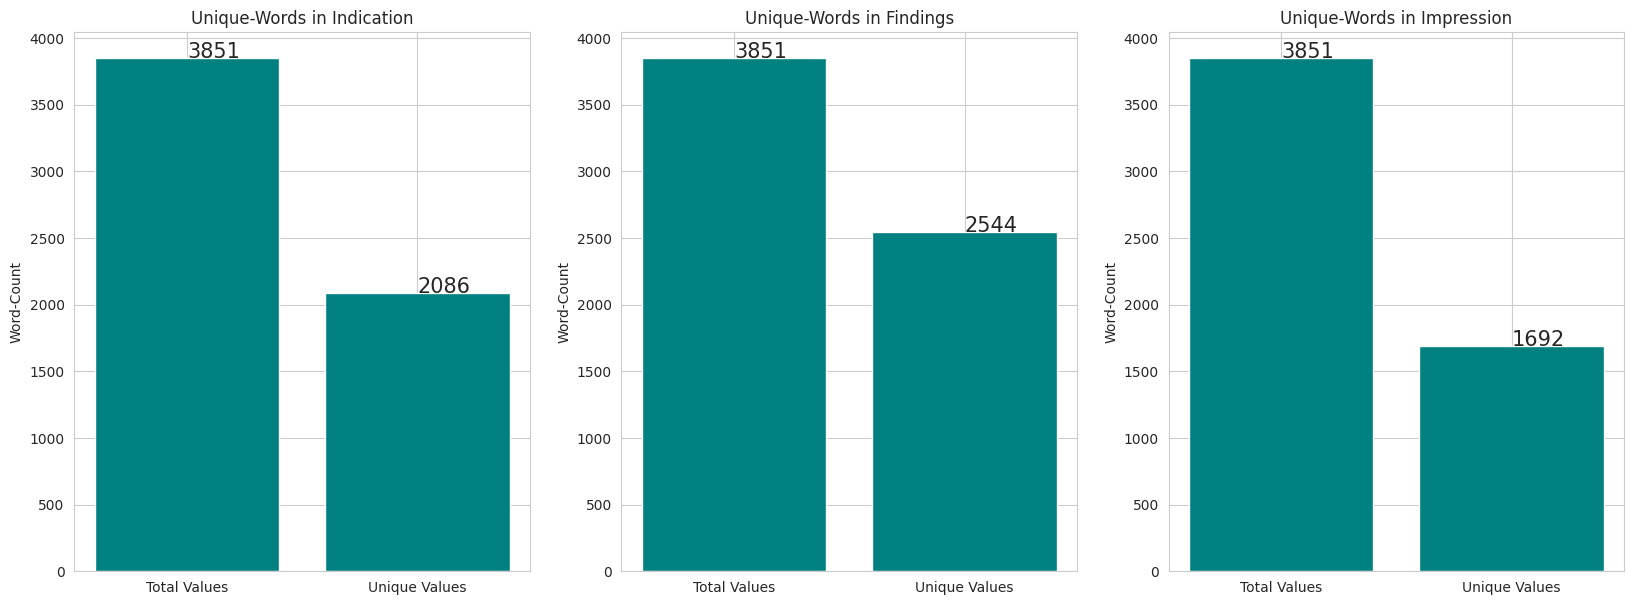

In [ ]:
plt.figure(figsize = (20,7))
plt.subplot(131)
unique_words_features(dataframe['indication'])
plt.title('Unique-Words in Indication')
plt.subplot(132)
unique_words_features(dataframe['findings'])
plt.title('Unique-Words in Findings')
plt.subplot(133)
unique_words_features(dataframe['impression'])
plt.title('Unique-Words in Impression')
plt.show()

In [ ]:
#Printing min,max and median of word_count
print("Maximum number of word count for Indication is:",np.max(dataframe.indication_count.values))
print("Minimum number of word count for Indication is:",np.min(dataframe.indication_count.values))
print("median number of word count for Indication is:",np.median(dataframe.indication_count.values))

Maximum number of word count for Indication is: 32
Minimum number of word count for Indication is: 1
median number of word count for Indication is: 3.0


### Plotting PDF and CDF for word_count distribution of Indication feature :

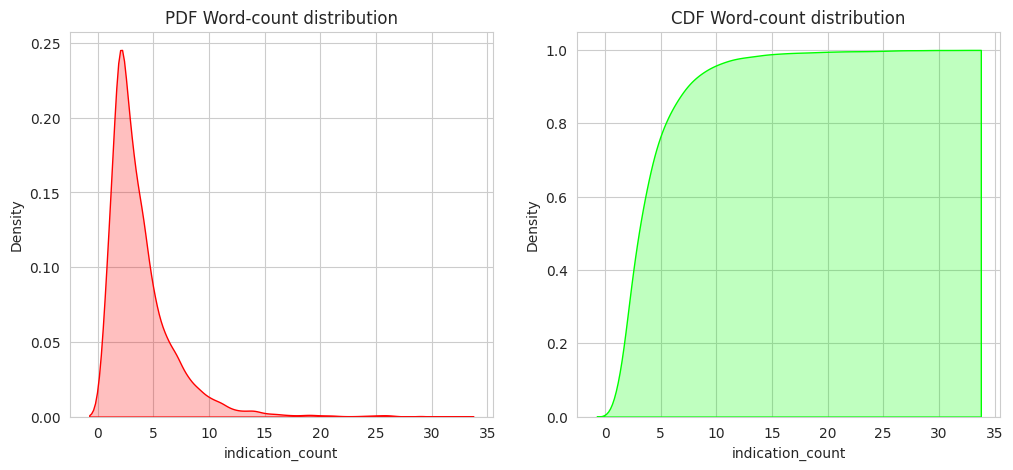

In [ ]:
#Plotting PDF and CDF for word_count distribution of Indication feature
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(dataframe['indication_count'],shade=True,color='Red')
plt.title("PDF Word-count distribution")
plt.subplot(122)
# Seaborn CDF
sns.distplot(dataframe['indication_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='Lime')
plt.title("CDF Word-count distribution")
plt.show()

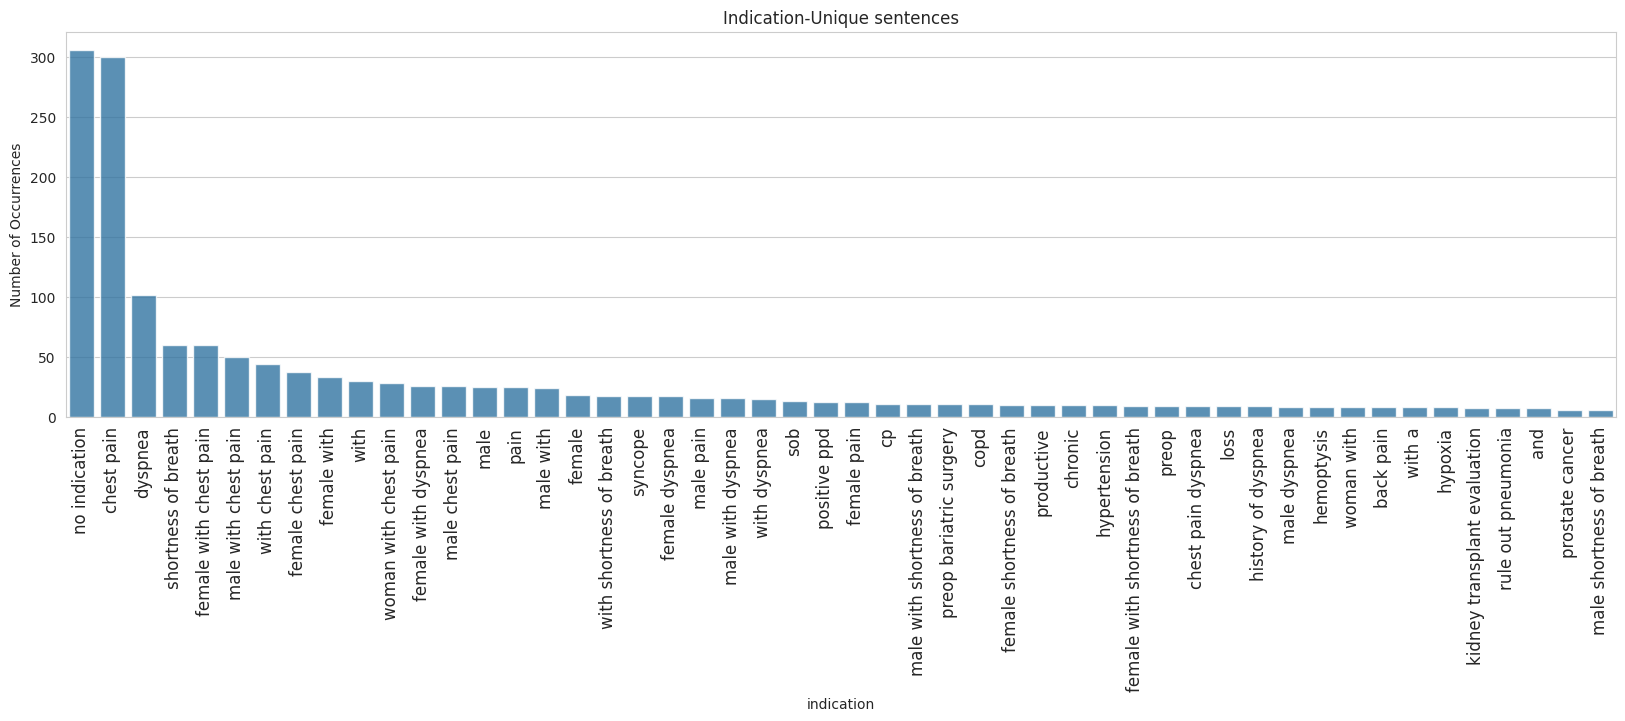

In [ ]:
#Plotting top 50 frequent sentences of Indication feature
sentences = dataframe['indication'].value_counts()[:50]
plt.figure(figsize=(20,5))
sns.barplot(x = sentences.index, y = sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("Indication-Unique sentences")
plt.show()

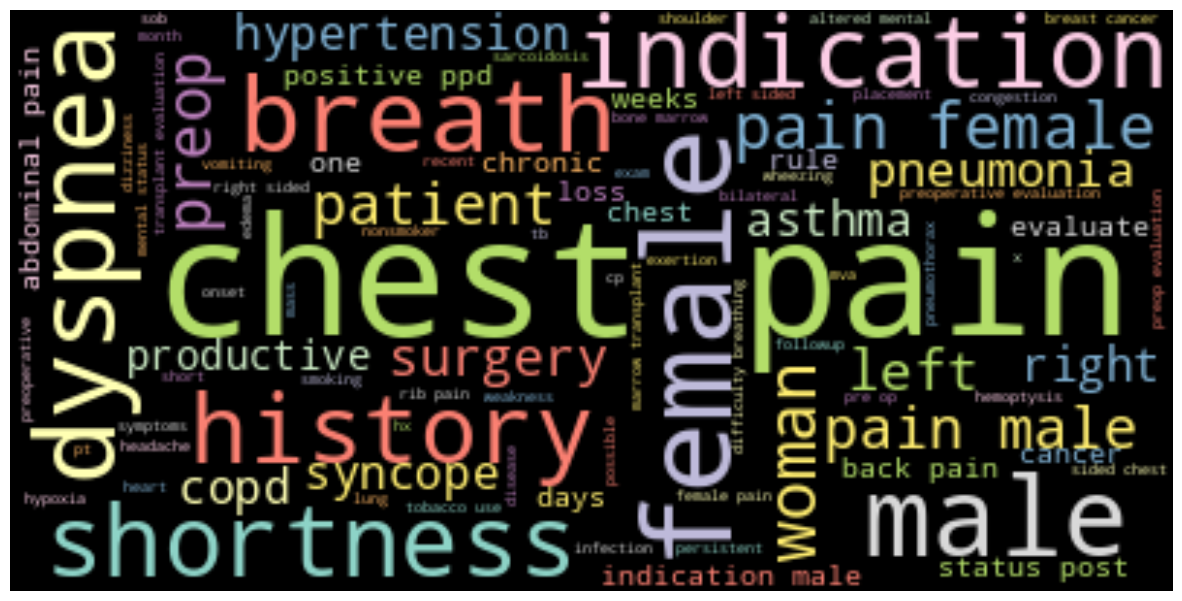

In [ ]:
#Word cloud on Indication feature
dictionary = WordCloud(max_words=500, background_color="black", colormap="Set3")
plt.figure(figsize=(15,10))
plt.imshow(dictionary.generate(' '.join(dataframe.indication.astype(str))), interpolation='Bilinear')
plt.axis("off")
plt.show()

### Analysis of Impression Feature :

In [ ]:
#Printing min,max and median of word_count
print("Maximum number of word count for Impression is:",np.max(dataframe.impression_count.values))
print("Minimum number of word count for Impression is:",np.min(dataframe.impression_count.values))
print("Median number of word count for Impression is:",np.median(dataframe.impression_count.values))

Maximum number of word count for Impression is: 123
Minimum number of word count for Impression is: 1
Median number of word count for Impression is: 5.0


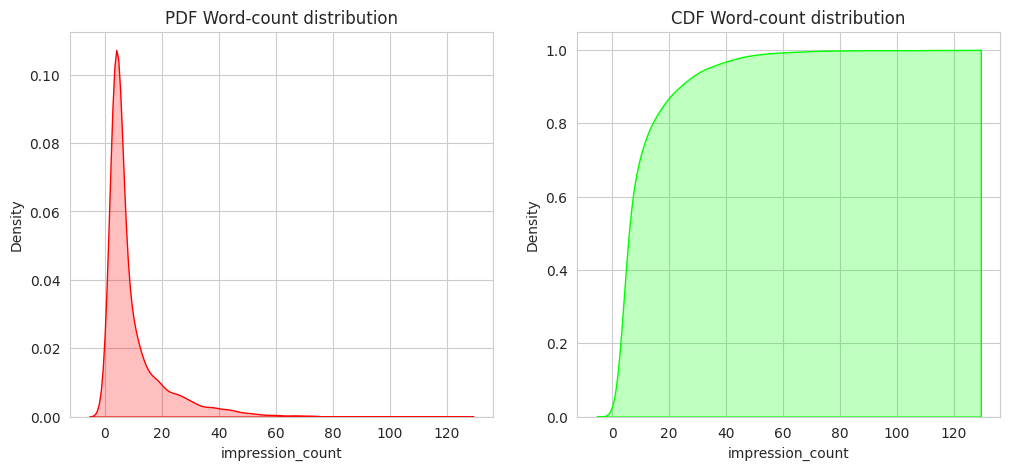

In [ ]:
#Plotting PDF and CDF for word_count distribution of Impression feature
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(dataframe['impression_count'],shade=True,color='Red')
plt.title("PDF Word-count distribution")
plt.subplot(122)
# Seaborn CDF
sns.distplot(dataframe['impression_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='Lime')
plt.title("CDF Word-count distribution")
plt.show()

In [ ]:
#Plotting top 50 frequent sentences of Impression feature
sentences = dataframe['impression'].value_counts()[:50]
plt.figure(figsize=(20,5))
sns.barplot(sentences.index, sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("Impression-Unique sentences")
plt.show()

###  Top 50 frequent sentences of Findings feature :

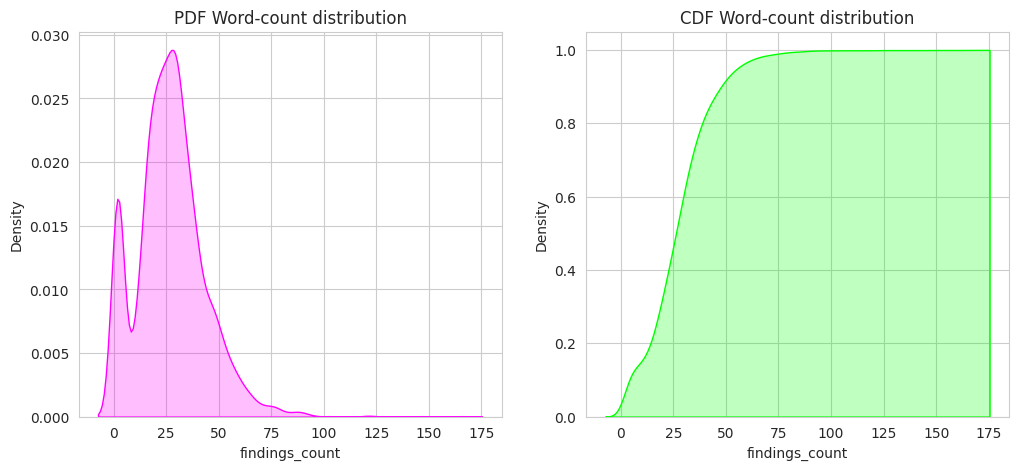

In [ ]:
#Plotting the PDF for word_count distribution of Findings feature
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(dataframe['findings_count'],shade=True,color='Magenta')
plt.title("PDF Word-count distribution")
plt.subplot(122)
# Seaborn CDF
sns.distplot(dataframe['findings_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='Lime')
plt.title("CDF Word-count distribution")
plt.show()

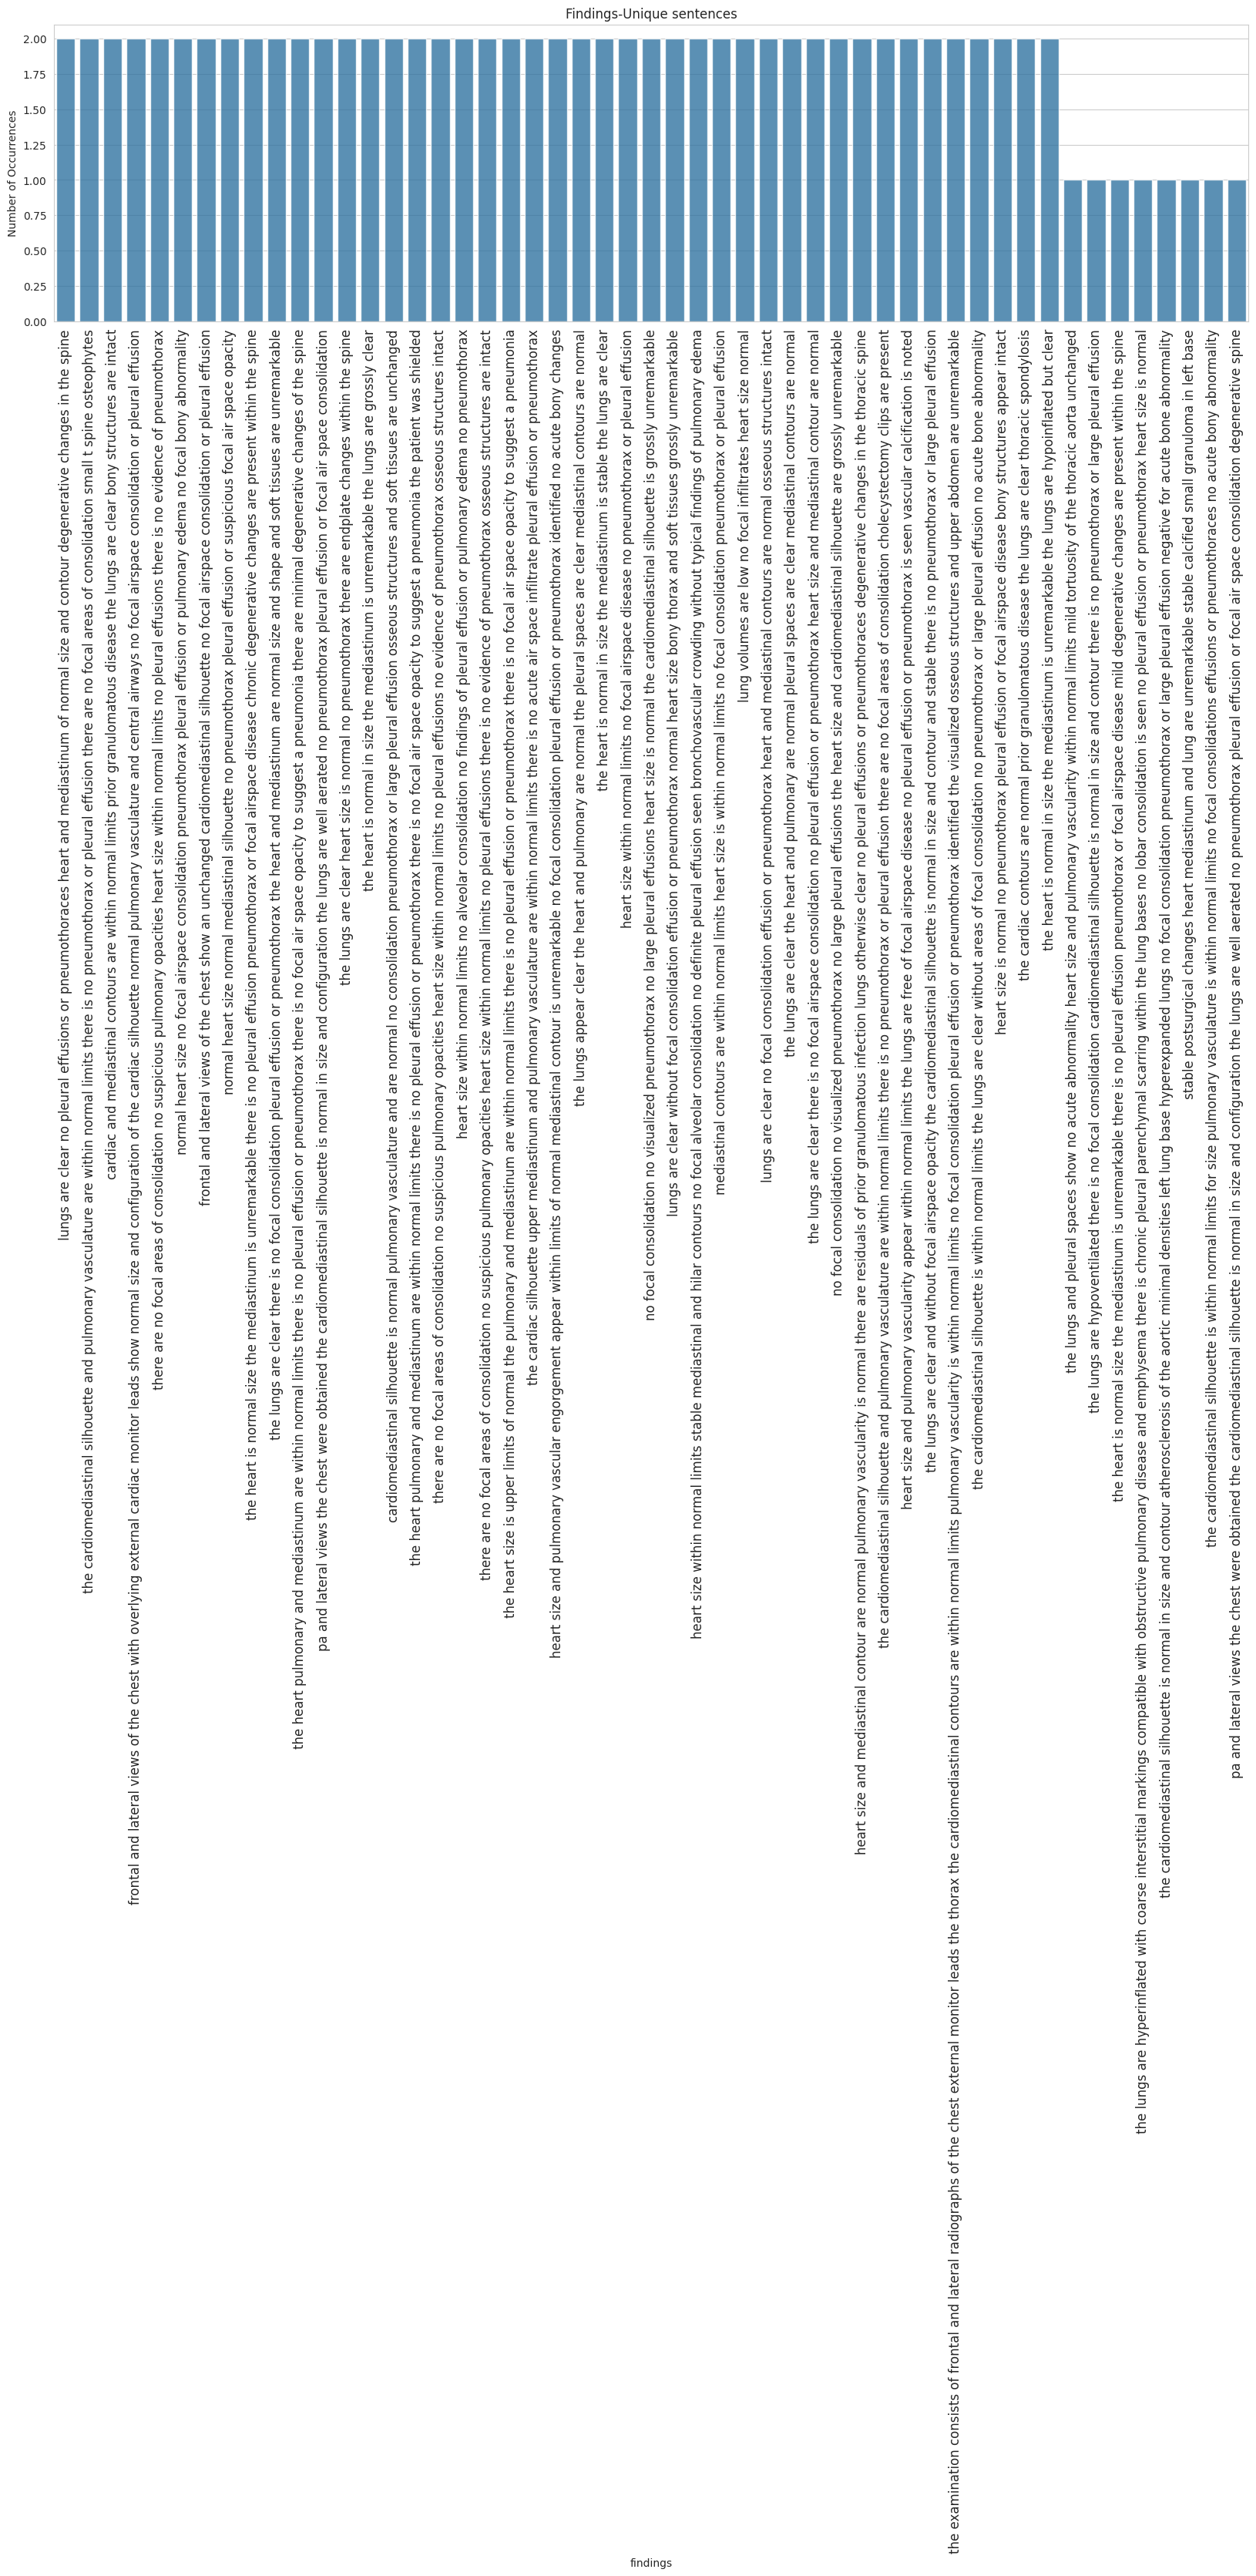

In [9]:
#Plotting top 50 frequent sentences of Findings feature
sentences = dataframe['findings'].value_counts()[100:151]
plt.figure(figsize=(20,5))
sns.barplot(x = sentences.index, y = sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("Findings-Unique sentences")
plt.show()

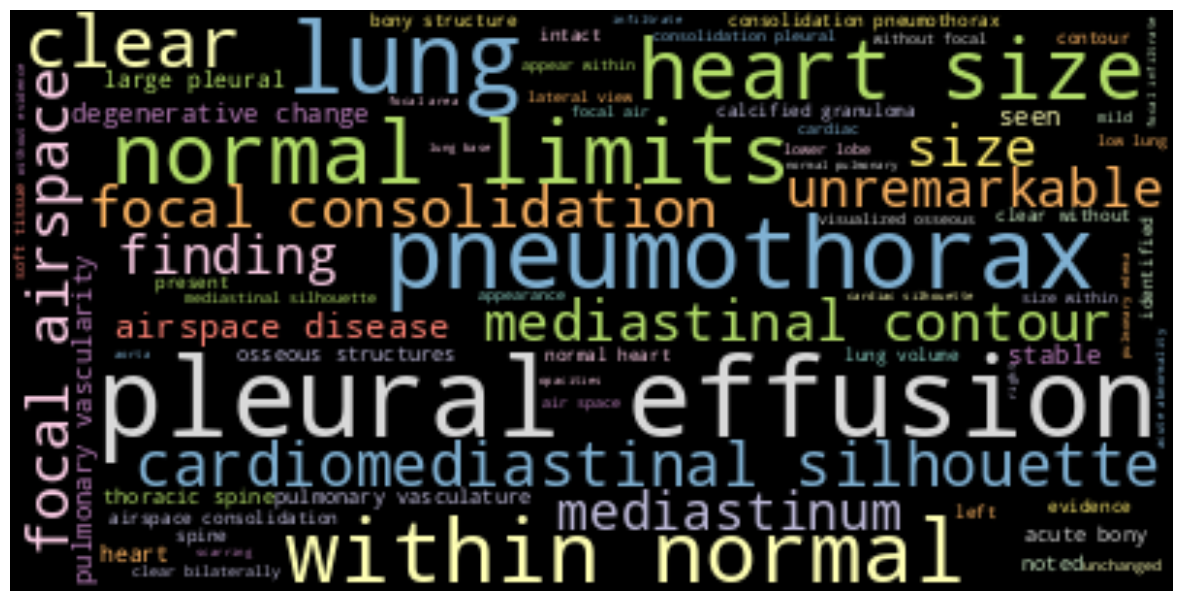

In [ ]:
#Word cloud on Findings feature
dictionary = WordCloud(max_words=500, background_color="black", colormap="Set3")
plt.figure(figsize=(15,10))
plt.imshow(dictionary.generate(' '.join(dataframe.findings.astype(str))), interpolation='Bilinear')
plt.axis("off")
plt.show()

### Observations for Findings feature :

* In finding feature, 50% data have less than 20 words per findings, 99% data have less than 48 words per findings. Only 1% data have legnth above 48.
* From wordcloud : pleural, effusion, silhouette, within, normal, lungs, cardiomediastinal are the highlighted words i.e. these are important words.

### Total Observations from EDA:

* The dataset contains chest X-ray images and radiology text reports. Each image has been paired with four captions such as Impressions, Findings, Comparison and Indication that provide clear descriptions of the salient entities and events. All the raw texts from xml files are parsed and created the dataset.

* I consider finding features as Target variable, as it has much data volume and from sample data points, It is clear that this feature gives most of the information present in images.

* Images are in different shapes. All the X-Ray images are human upper body particularly about Chest part.

* Each patient have multiple x-rays associated with them. The maximum number of images associated with a report can be 5 while the minimum is 0. The highest frequency of being associated with a report are 2 images.

* Data is incomplete. Because all the features have few missing values except caption. We have to impute the missing values in data preprocessing step.

* In text features there are some unknown values like XXXX XXXXX these are replaced with empty string.

* We have total of 3955 records and Impression is our target variable.

* Most occurring words of diffrent features:

  * Indication: Chest pain

  * Findings: Pleural effusion

  * Impression: acute cardiopulmonary
  
* I created wordcloud, for 500 most frequent words of the feature. These are important words. Some of them are: acute, findings, disease, abnormality, high, right, impression, etc.